In [1]:
%load_ext autoreload
%autoreload 2

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import dblquad
import utils

In [10]:
figsize = (12, 6)

In [18]:
def _const_curve(t):
    return np.full(len(t), .234**2) if isinstance(t, np.ndarray) else .234**2

In [19]:
xi_1 = utils.VarianceCurve(_const_curve)
xi_2 = utils.VarianceCurve(lambda t: .234**2 * (1. + t)**2)
xi_3 = utils.VarianceCurve(lambda t: .234**2 * np.sqrt(1. + t))

$$
\xi_t(u) = \mathbb{E}[V_u|\mathcal{F}_t], \qquad u > t
$$

In [20]:
print(f"xi_1 = {xi_1(utils.DELTA):.6f}")
print(f"xi_2 = {xi_2(utils.DELTA):.6f}")
print(f"xi_3 = {xi_3(utils.DELTA):.6f}")

xi_1 = 0.054756
xi_2 = 0.068569
xi_3 = 0.057924


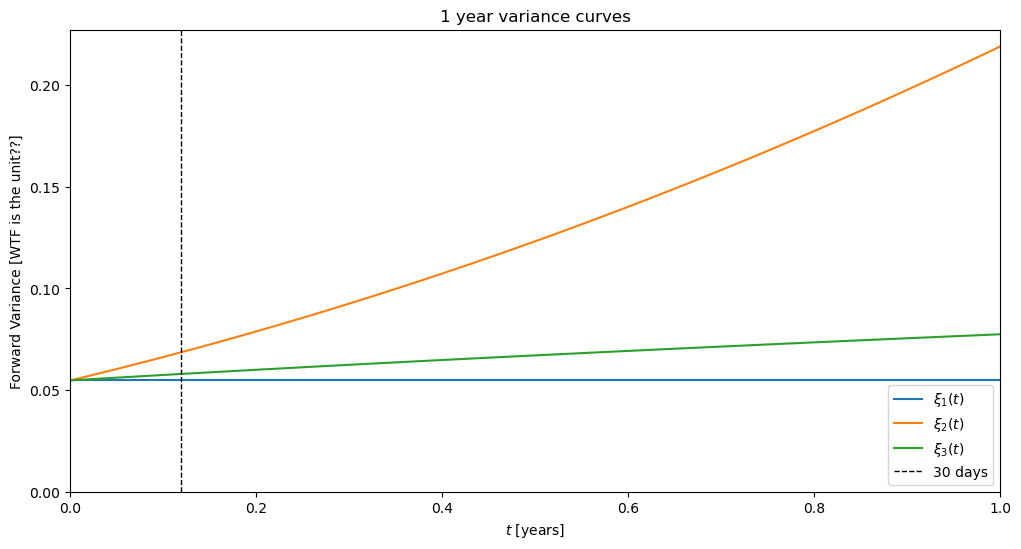

In [36]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
xaxis = np.linspace(0, 1., 100)

ax.plot(xaxis, xi_1(xaxis), label=r"$\xi_1(t)$")
ax.plot(xaxis, xi_2(xaxis), label=r"$\xi_2(t)$")
ax.plot(xaxis, xi_3(xaxis), label=r"$\xi_3(t)$")

ax.axvline(utils.DELTA, ls='--', lw=1, color='black', label='30 days')

ax.set_title("1 year variance curves")
ax.set_xlabel(r"$t$ [years]"); ax.set_ylabel("Forward Variance [WTF is the unit??]")
ax.set_ylim(bottom=0); ax.set_xlim(0, 1)
ax.legend()

plt.show()

# Picing

In [60]:
exp_vix = utils.expected_vix_sq(xi_1, T=0)
exp_vix_sq = utils.moment2_vix_sq(xi_1, utils.DELTA, volvol, H, T=0)

In [61]:
np.sqrt(exp_vix / utils.DELTA)

0.23400000000000004

In [62]:
np.sqrt(np.exp(utils.mu_lognormal(exp_vix, exp_vix_sq)) / utils.DELTA)

0.23400000000000018

In [39]:
H = 0.07
volvol = 1.9 * utils.c_h(H) * np.sqrt(2 * H) / 2

In [64]:
def price(curve, T):
    exp_vix = utils.expected_vix_sq(curve, T=T)
    exp_vix_sq = utils.moment2_vix_sq(curve, utils.DELTA, volvol, H, T=T)
    return np.sqrt(np.exp(utils.mu_lognormal(exp_vix, exp_vix_sq)) / utils.DELTA)

In [72]:
import warnings
warnings.filterwarnings('ignore')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:47<00:00, 10.74s/it]


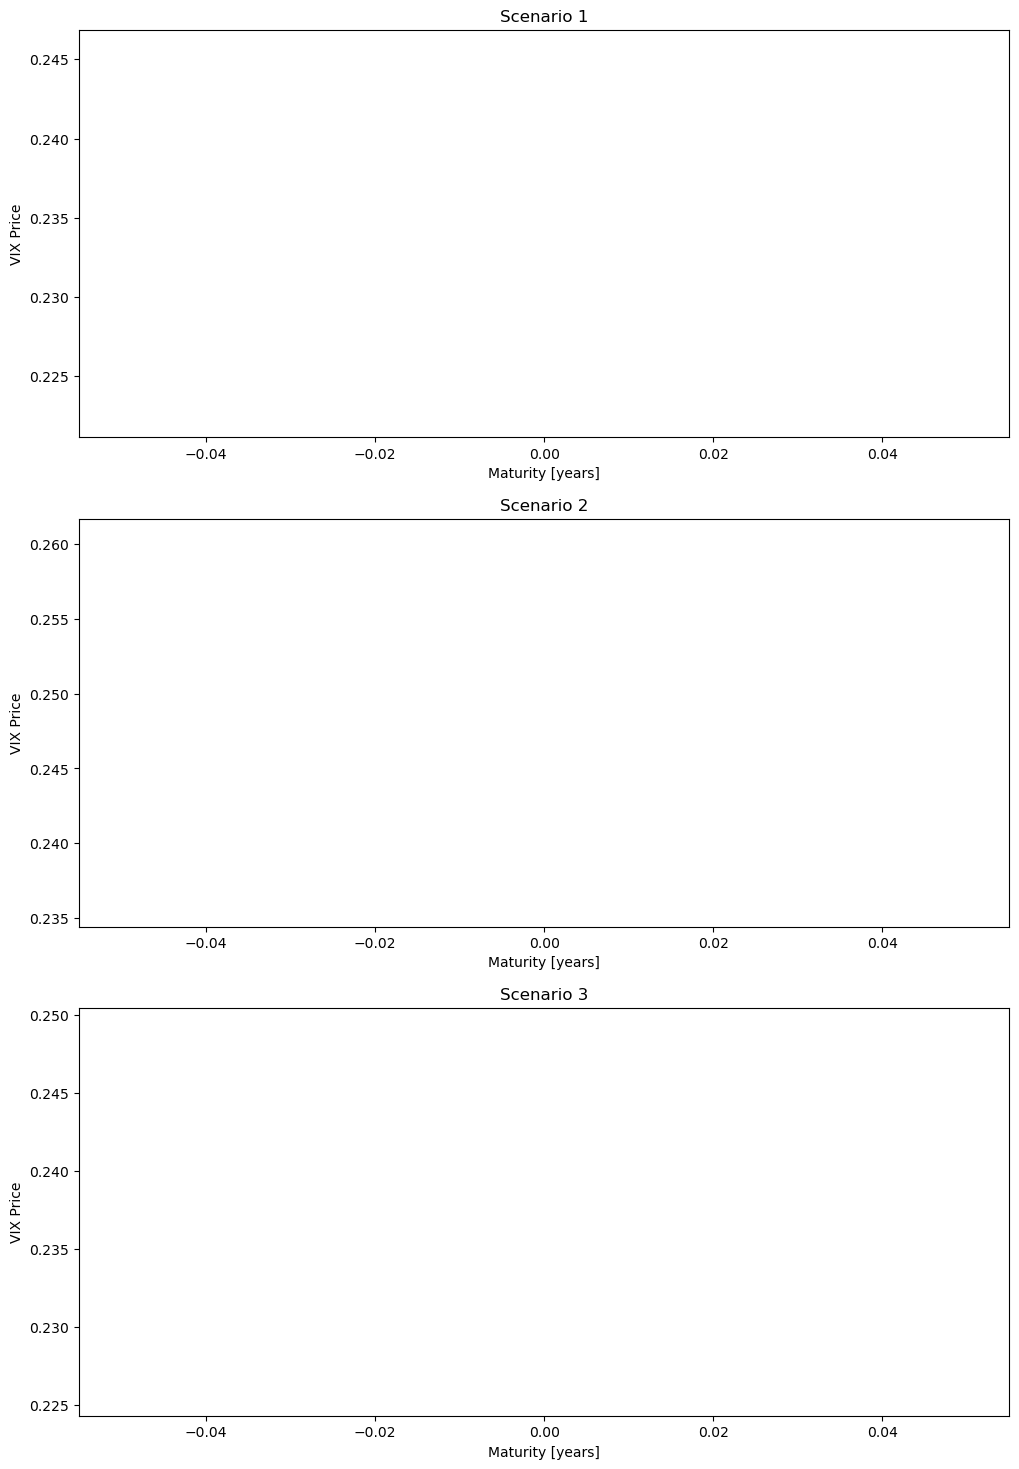

In [73]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
maturity = np.linspace(0, 2., 10)

for i, curve in enumerate((xi_1, xi_2, xi_3)):
    ax = axs[i]
    prices = []
    for tau in tqdm(maturity):
        vix = price(curve, T=tau)
        prices.append(vix)
    ax.plot(maturity, prices, label=f'xi_{i+1}(t)')
    ax.set_title(f"Scenario {i+1}")
    ax.set_xlabel("Maturity [years]"); ax.set_ylabel("VIX Price")

plt.show()

In [74]:
prices

[0.23739138945285354, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [75]:
maturity

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [76]:
price(xi_1, 0.2)

nan

In [77]:
utils.expected_vix_sq(xi_1, T=0.2)

-0.004432628571428574

In [79]:
utils.moment2_vix_sq(xi_1, utils.DELTA, volvol, H, T=0.2)

1.998832334426957e-05

In [85]:
for tau in maturity:
    print(f"Tau: {tau:.2f}\tExp: {utils.expected_vix_sq(xi_1, T=tau):.6f}\tExp_sq: {utils.moment2_vix_sq(xi_1, utils.DELTA, volvol, H, T=tau):.6f}")

Tau: 0.00	Exp: 0.006519	Exp_sq: 0.000042
Tau: 0.22	Exp: -0.005649	Exp_sq: nan
Tau: 0.44	Exp: -0.017817	Exp_sq: nan
Tau: 0.67	Exp: -0.029985	Exp_sq: nan
Tau: 0.89	Exp: -0.042153	Exp_sq: nan
Tau: 1.11	Exp: -0.054321	Exp_sq: nan


KeyboardInterrupt: 

In [84]:
for tau in maturity:
    print(f"Tau: {tau:.2f}\tExp: {utils.expected_vix_sq(xi_2, T=tau):.6f}\tExp_sq: {utils.moment2_vix_sq(xi_2, utils.DELTA, volvol, H, T=tau):.6f}")

Tau: 0.00	Exp: 0.007325	Exp_sq: 0.000054
Tau: 0.22	Exp: -0.007747	Exp_sq: nan
Tau: 0.44	Exp: -0.029429	Exp_sq: nan
Tau: 0.67	Exp: -0.058923	Exp_sq: nan
Tau: 0.89	Exp: -0.097430	Exp_sq: nan
Tau: 1.11	Exp: -0.146152	Exp_sq: nan


KeyboardInterrupt: 